In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of houses')

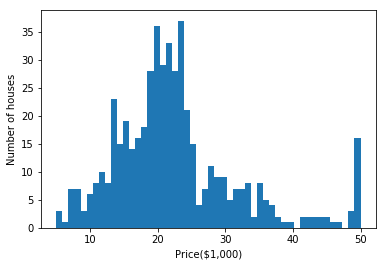

In [5]:
plt.hist(boston.target, bins = 50)
plt.xlabel('Price($1,000)')
plt.ylabel('Number of houses')

Text(0,0.5,'Price ($1000)')

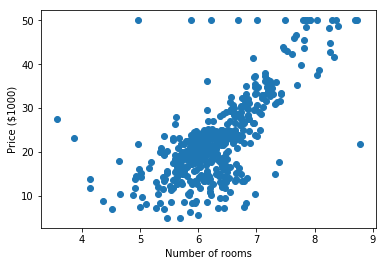

In [6]:
plt.scatter(boston.data[:, 5], boston.target)
plt.xlabel('Number of rooms')
plt.ylabel('Price ($1000)')

In [7]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['Price'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/Users/misuhiroshi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


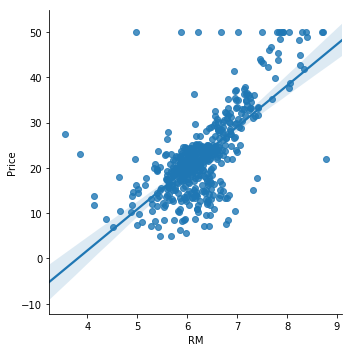

In [11]:
sns.lmplot('RM', 'Price', data = boston_df)

In [12]:
# 部屋数
X = boston_df.RM

In [13]:
X = np.vstack([X, np.ones(len(X))]).T
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [14]:
Y = boston_df.Price

In [15]:
#linalg 線形代数          linear algebra
#lstsq 最小二乗法       least squares method 
#Y = aX + b
#配列の０がaとbの値

a, b = np.linalg.lstsq(X,Y, rcond = None)[0]

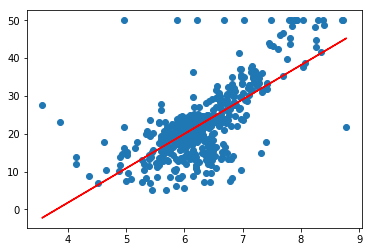

In [16]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM
plt.plot(x, a*x+b, 'r')

In [17]:
result = np.linalg.lstsq(X,Y, rcond = None)

In [18]:
#配列の１番目が誤差の全体の値

error_total = result[1]
rmse = np.sqrt(error_total/ len(X))

In [19]:
print('平均二乗誤差の平方根={:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根=6.60


In [20]:
import sklearn
from sklearn.linear_model import LinearRegression

In [21]:
lreg = LinearRegression()

In [22]:
X_multi = boston_df.drop('Price', axis = 1)

In [23]:
X_multi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
X_multi.shape

(506, 13)

In [25]:
Y_target = boston_df.Price

In [26]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#Bを求めている

lreg.intercept_

36.491103280361344

In [28]:
#係数 coefficient
#Aを求めている

len(lreg.coef_)

13

In [29]:
coeff_df = DataFrame(boston_df.columns)

In [30]:
coeff_df.head()

,0
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX


In [31]:
coeff_df.columns = ['Features']

In [32]:
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

In [33]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [34]:
lreg.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [58]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, boston_df.Price)

In [59]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [60]:
lreg = LinearRegression()

In [61]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
pred_train = lreg.predict(X_train)

In [63]:
pred_test = lreg.predict(X_test)

In [64]:
np.mean((Y_train - pred_train)**2)

21.510405891600115

In [65]:
np.mean((Y_test - pred_test)**2)

24.271068870925355

In [147]:
#シミュレーション
#実際は１３の階乗分やる必要があるので最適とは言えない
def num_thousand_plus(x):
    return x + 1000
    
runs = 500
train_simulations = np.zeros(runs)
test_simulations = np.zeros(runs)
error_sum = np.zeros(runs)
error_sum = num_thousand_plus(error_sum)
for run in range(1, runs):
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, boston_df.Price)
    lreg = LinearRegression()
    lreg.fit(X_train, Y_train)
    pred_train = lreg.predict(X_train)
    pred_test = lreg.predict(X_test)
    
    train_simulations[run] = np.mean((Y_train - pred_train)**2)
    test_simulations[run] = np.mean((Y_test - pred_test)**2)
    error_sum[run] = train_simulations[run] + test_simulations[run]
print(np.min(error_sum))

36.63125094135065


Text(0.5,1,'Residual Plots')

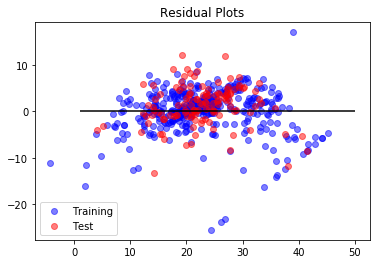

In [142]:
train = plt.scatter(pred_train, (pred_train - Y_train), c = 'b', alpha = 0.5)
test = plt.scatter(pred_test, (pred_test - Y_test), c = 'r', alpha = 0.5)
plt.hlines(y = 0, xmin = 1.0, xmax = 50)

plt.legend((train,test),('Training', 'Test'), loc = 'lower left')
plt.title('Residual Plots')